# KineticDataset tutorial
## Goal:
1. To plot and analyze data fron in vitro substrate screens.
2. To aggregate summary data outputs form individual screens to generate a matrix of samples of interest vs. peptides of interest.
3. To plot aggregated data using relevant visualization tools.

In [1]:
pwd

'/Users/mariaalonso/Work/protease_activity_analysis/notebooks'

In [2]:
cd ..


/Users/mariaalonso/Work/protease_activity_analysis


In [36]:
import protease_activity_analysis as paa

In [37]:
from utils import get_output_dir
import pandas as pd
import os

In [38]:
in_path = 'data/stm_kinetic/MMP13_stm.xlsx'
fc_time = 45
linear_time = 45
out_dir = get_output_dir()

In [39]:
data = paa.kinetic.KineticDataset(in_path, fc_time, linear_time, out_dir)

In [40]:
# Can access fc over time using get_fc for all samples tested
data.get_fc()

MMP13-Substrate    0          1          3          5          7  \
0               Q1  1.0   1.678125   3.026562   4.779687   7.026562   
1               Q1  1.0   1.755302   3.166395   5.016313   7.332790   
2               Q3  1.0   3.698895   7.875691  12.878453  18.687845   
3               Q3  1.0   3.576087   7.394022  12.078804  17.538043   
4               Q5  1.0   1.547667   2.271639   3.088951   4.059434   
5               Q5  1.0   1.546293   2.185856   2.887257   3.656987   
6               Q6  1.0   5.355164  10.491184  16.372796  22.964736   
7               Q6  1.0   8.203046  15.649746  23.532995  31.439086   
8               Q7  1.0   2.464533   4.132353   6.066609   8.351211   
9               Q7  1.0   2.573074   4.224978   6.178034   8.528787   
10              Q9  1.0   1.051510   1.010657   0.993783   0.969805   
11              Q9  1.0   1.002703   0.975676   0.940541   0.927928   
12            SQ14  1.0   1.858974   2.339744   2.990385   3.852564   
13            SQ14  1.0   1.431373   1.761905   2.221289   2.848739   
14             PQ2  1.0   1.124378   1.089552   1.074627   1.064677   
15             PQ3  1.0  15.320665  22.691211  27.648456  31.479810   
16             PQ3  1.0   3.841304   6.339130   8.652174  10.897826   
17             PQ4  1.0   1.048544   1.033981   1.024272   1.024272   
18             PQ4  1.0   1.157407   1.236111   1.245370   1.254630   
19            PQ13  1.0   1.219355   1.238710   1.200000   1.187097   
20            PQ13  1.0   1.019231   1.009615   0.985577   0.990385   
21             PX2  1.0   7.026432  10.920705  14.585903  18.392070   
22             PX2  1.0   5.501401   9.974790  14.176471  18.302521   
23             PX3  1.0  32.050360  54.604317  69.273381  82.035971   
24             PX3  1.0  25.713415  45.000000  58.841463  70.591463   
25             PX4  1.0  21.780347  32.838150  40.878613  46.069364   
26             PX4  1.0  14.279476  23.475983  30.034934  35.698690   
27            PX11  1.0   3.108571   5.373333   7.840000  10.316190   
28            PX11  1.0   3.927505   6.690832   9.554371  12.537313   
29             PQ2  1.0   1.035088   1.017544   1.004386   1.000000   

            9          11          13          15  ...          29  \
0    9.456250   11.815625   14.037500   16.343750  ...   39.309375   
1   10.032626   12.830343   15.662316   18.618271  ...   42.194127   
2   25.154696   31.555249   37.276243   42.356354  ...   64.118785   
3   23.500000   29.562500   34.866848   39.627717  ...   63.114130   
4    5.044675    6.078580    6.919426    7.666534  ...    9.459513   
5    4.472497    5.286642    6.000683    6.638196  ...    8.511787   
6   29.435768   35.896725   41.921914   47.579345  ...   69.390428   
7   38.725888   45.540609   51.733503   56.992386  ...   81.164975   
8   10.792388   13.262111   15.463668   17.592561  ...   32.413495   
9   10.991143   13.519929   15.767050   17.898140  ...   32.621789   
10   0.962700    0.927176    0.923623    0.911190  ...    0.819716   
11   0.915315    0.903604    0.881982    0.875676  ...    0.803604   
12   4.900641    5.993590    7.092949    8.131410  ...   15.964744   
13   3.627451    4.492997    5.408964    6.249300  ...   13.322129   
14   1.039801    1.039801    1.019900    0.995025  ...    0.925373   
15  34.657957   37.489311   39.579572   41.465558  ...   48.479810   
16  13.110870   15.221739   17.202174   19.110870  ...   27.663043   
17   1.038835    1.053398    1.092233    1.140777  ...    1.606796   
18   1.300926    1.291667    1.314815    1.375000  ...    1.935185   
19   1.161290    1.135484    1.141935    1.096774  ...    1.045161   
20   0.966346    0.947115    0.927885    0.918269  ...    0.846154   
21  21.735683   25.118943   27.986784   30.841410  ...   40.907489   
22  22.246499   26.098039   29.364146   32.246499  ...   41.873950   
23  92.928058  102.769784  109.654676  115.575540  ...  122.071942   
24  80.823171   90.713415   98.554878  104.780488  

In [41]:
# Can access fc over time averaged between duplicates using get_fc_mean()
data.get_fc_mean()

0          1          3          5          7          9   \
MMP13-Substrate                                                               
PQ13             1.0   1.104683   1.107438   1.077135   1.074380   1.049587   
PQ2              1.0   1.076923   1.051282   1.037296   1.030303   1.000000   
PQ3              1.0   9.326901  14.153235  17.729852  20.733258  23.407491   
PQ4              1.0   1.104265   1.137441   1.137441   1.142180   1.172986   
PX11             1.0   3.494970   5.994970   8.648893  11.364185  14.078471   
PX2              1.0   6.094178  10.342466  14.335616  18.337329  22.047945   
PX3              1.0  28.620462  49.405941  63.627063  75.841584  86.376238   
PX4              1.0  17.507463  27.504975  34.701493  40.161692  44.793532   
Q1               1.0   1.715882   3.094972   4.895451   7.176377   9.738228   
Q3               1.0   3.636986   7.632877  12.475342  18.108219  24.320548   
Q5               1.0   1.546927   2.225432   2.980309   3.842657   4.736474   
Q6               1.0   6.773704  13.060683  19.939317  27.185841  34.063211   
Q7               1.0   2.518162   4.178118   6.121663   8.438950  10.890591   
Q9               1.0   1.027281   0.993292   0.967352   0.949016   0.939177   
SQ14             1.0   1.630792   2.031390   2.579970   3.316891   4.221226   

                        11          13          15          17  ...  \
MMP13-Substrate                                                 ...   
PQ13              1.027548    1.019284    0.994490    0.988981  ...   
PQ2               1.004662    0.983683    0.972028    0.955711  ...   
PQ3              25.862656   27.895573   29.793417   31.658343  ...   
PQ4               1.175355    1.206161    1.260664    1.308057  ...   
PX11             16.798793   19.267606   21.595573   23.668008  ...   
PX2              25.717466   28.828767   31.700342   34.058219  ...   
PX3              96.244224  103.646865  109.732673  113.755776  ...   
PX4              48.589552   52.338308   55.263682   57.584577  ...   
Q1               12.312051   14.832402   17.456504   20.375100  ...   
Q3               30.550685   36.061644   40.980822   45.390411  ...   
Q5                5.652006    6.424549    7.112624    7.658999  ...   
Q6               40.700379   46.809102   52.268015   57.484197  ...   
Q7               13.389497   15.613567   17.743545   19.590372  ...   
Q9                0.915474    0.902952    0.893560    0.877460  ...   
SQ14              5.192825    6.194320    7.127055    8.070254  ...   

                         29          31          33          35          37  \
MMP13-Substrate                                                               
PQ13               0.931129    0.922865    0.925620    0.914601    0.914601   
PQ2                0.888112    0.878788    0.871795    0.878788    0.869464   
PQ3               37.610670   37.561862   37.363224   37.071510   37.046538   
PQ4                1.774882    1.902844    2.021327    2.139810    2.291469   
PX11              33.701207   34.315895   34.610664   34.772636   34.710262   
PX2               41.498288   41.982877   42.210616   42.306507   42.258562   
PX3              117.138614  117.504950  116.993399  116.924092  116.544554   
PX4               67.455224   68.116915   69.156716   69.554726   69.256219   
Q1                40.720670   41.716680   42.157223   42.505986   42.485235   
Q3                63.612329   64.260274   64.200000   64.194521   63.695890   
Q5                 8.949025    8.896209    8.864372    8.849650    8.788370   
Q6                75.255373   74.932996   74.566372   74.293300   73.623262   
Q7                32.516411   33.571116   34.196499   34.818818   34.968490   
Q9                 0.811717    0.800537    0.795170    0.793381    0.789356   
SQ14              14.554559   15.466368   16.237668   17.008969   17.626308   

                         39          41          43          45          47  
MMP13-Substrate                             

In [42]:
# Can access fc at time fc_time using get_fc_x
data.get_fc_x()

MMP13-Substrate
PQ13      0.903581
PQ2       0.869464
PQ3      36.408627
PQ4       2.827014
PX11     34.586519
PX2      42.316781
PX3     115.485149
PX4      69.323383
Q1       42.285714
Q3       62.909589
Q5        8.682370
Q6       72.512010
Q7       35.150547
Q9        0.778623
SQ14     19.411061
Name: 45, dtype: float64

In [43]:
# Can access zscores of fc at time fc_time using get_fc_x
data.get_fc_zscore()

Z-scored fold change at t=45
MMP13-Substrate                              
PQ13                                -1.104780
PQ2                                 -1.105845
PQ3                                  0.003494
PQ4                                 -1.044741
PX11                                -0.053382
PX2                                  0.187914
PX3                                  2.471831
PX4                                  1.030913
Q1                                   0.186944
Q3                                   0.830709
Q5                                  -0.861968
Q6                                   1.130444
Q7                                  -0.035776
Q9                                  -1.108680
SQ14                                -0.527077

In [44]:
# Can access initial rate as calculated from t=0 to t=linear_time
data.get_initial_rate()

Initial rate at t=45
MMP13-Substrate                      
PQ13                        -0.388889
PQ2                         -0.622222
PQ3                        346.611111
PQ4                          8.566667
PX11                       370.944444
PX2                        268.100000
PX3                        385.433333
PX4                        305.177778
Q1                         574.788889
Q3                         502.155556
Q5                         463.844444
Q6                         628.511111
Q7                         867.044444
Q9                          -5.500000
SQ14                       136.855556

In [45]:
# Can access zscores of initial rates as calculated from t=0 to t=linear_time
data.get_initial_rate_zscore()

Initial rate at t=45
MMP13-Substrate                      
PQ13                        -1.276389
PQ2                         -1.277309
PQ3                          0.091352
PQ4                         -1.241090
PX11                         0.187265
PX2                         -0.218109
PX3                          0.244374
PX4                         -0.071962
Q1                           0.990742
Q3                           0.704449
Q5                           0.553441
Q6                           1.202494
Q7                           2.142701
Q9                          -1.296535
SQ14                        -0.735424

In [46]:
# Save output of interest to .csv (e.g. fc at time 45) - created 'MMP13_fc_45.csv' in output directory
data.write_csv(data.get_fc_x(), 'fc_45')

<AxesSubplot:title={'center':'MMP13'}, xlabel='Time (min)', ylabel='Raw Intensity'>

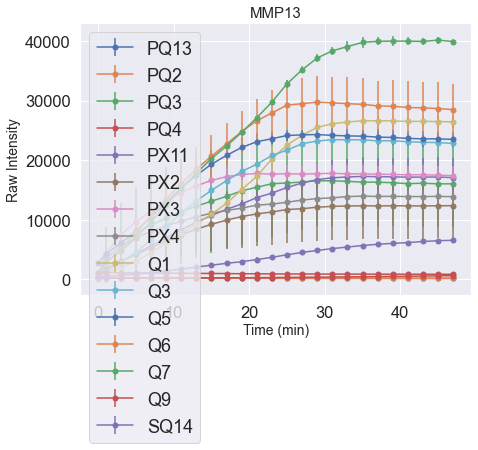

In [47]:
# Plot raw kinetic data - also saves 'MMP13_Fold Change_kinetic.pdf' in output folder
data.plot_kinetic(data.get_raw(), title = data.sample_name, ylabel = 'Raw Intensity')

<AxesSubplot:title={'center':'MMP13'}, xlabel='Time (min)', ylabel='Fold Change'>

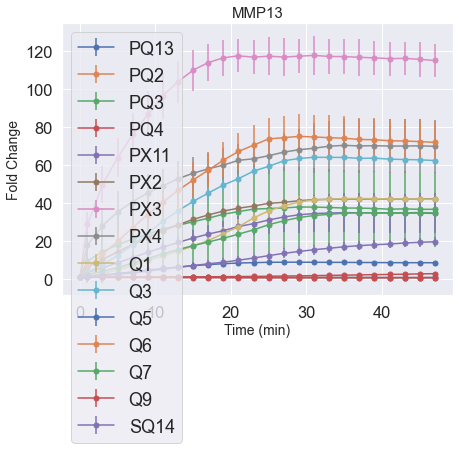

In [48]:
# Plot kinetic data as a function of fold change over time -  saves 'MMP13_Fold Change_kinetic.pdf' in output folder
data.plot_kinetic(data.get_fc(), title = data.sample_name, ylabel = 'Fold Change')

In [49]:
data.get_sample_name()

'MMP13'

In [50]:
# Define path for folder where all raw input files for a screen are saved, load and analyze all relevant data, save fc as csv for subsequent data aggregation and visualization
in_path = 'data/stm_kinetic'
fc_time = 45
linear_time = 45
out_dir = get_output_dir()
sample_list = []

for filename in os.listdir(in_path):
    if not filename.startswith('.'):
        print('Analyzing ', filename)
        full_file_path = os.path.join(in_path, filename)
        data_temp = paa.kinetic.KineticDataset(full_file_path, fc_time, linear_time, out_dir)
        data_temp.write_csv(data_temp.get_fc_x(), 'fc_45')
        sample_list.append(data_temp.get_sample_name())
    
print(sample_list) 

Analyzing  PRSS22_stm.xlsx
Analyzing  KLK14_stm.xlsx
Analyzing  MMP11_stm.xlsx
Analyzing  MMP3_stm.xlsx
Analyzing  NAPSA_stm.xlsx
Analyzing  KLK13_stm.xlsx
Analyzing  ACE2_stm.xlsx
Analyzing  KLK6_stm.xlsx
Analyzing  CTSD_stm.xlsx
Analyzing  PRSS8_stm.xlsx
Analyzing  PRSS3_stm.xlsx
Analyzing  F7_stm.xlsx
Analyzing  MMP13_stm.xlsx
Analyzing  MMP12_stm.xlsx
Analyzing  MMP1_stm.xlsx
['PRSS22', 'KLK14', 'MMP11', 'MMP3', 'NAPSA', 'KLK13', 'ACE2', 'KLK6', 'CTSD', 'PRSS8', 'PRSS3', 'F7', 'MMP13', 'MMP12', 'MMP1']


In [51]:
# Get all paths to output files of interest (e.g. FC at 45 min), for proteases of interest, here all proteases in the recombinant screen
fc_files = []
for prot in sample_list:
    fc_files.append(os.path.join(out_dir, prot, str(prot)+'_fc_45.csv'))

    
# Define name of screen that summarizes output files of interest and generate matrix of sample vs. substrate
screen_name = 'STM screen'
screen_out_dir = os.path.join(out_dir, screen_name)

if not os.path.exists(screen_out_dir):
    os.makedirs(screen_out_dir)
    print('Directory created', screen_out_dir)

agg_df = paa.vis.aggregate_data(fc_files, screen_out_dir)

In [52]:
# Visualize matrix
agg_df

PRSS22_fc_45  KLK14_fc_45  MMP11_fc_45  MMP3_fc_45  NAPSA_fc_45  \
                                                                        
PQ13      0.742081     0.862191     0.875312    0.773836     0.909091   
PQ2       0.842508     0.967495     0.919149    0.769912     0.923077   
PQ3       0.704388     0.796204     0.657116    0.565111     1.601770   
PQ4       0.745431     0.883392     0.923246    0.759924    11.960000   
PX11      0.758686     0.866025     0.878007    0.700957    10.500000   
PX2       0.759104     0.889625     0.877329    0.730024     1.018519   
PX3       0.791262     0.941860     0.859223    0.763359     1.000000   
PX4       0.841837     0.903448     0.750400    0.872694     1.034483   
Q1        0.718103     0.837414     0.732537    0.769671     1.000000   
Q3        0.603711     0.808357     0.718543    0.737874     1.764706   
Q5        0.629701     0.831398     0.690279    0.665879     4.243056   
Q6        0.875686     0.912676     0.873551    0.821224     1.321429   
Q7        0.722329     0.900705     0.807707    0.773273     1.194444   
Q9        0.708406     0.898370     0.803215    0.752030     1.197368   
SQ14      0.716650     0.966431     0.768463    0.751196     0.940000   

      KLK13_fc_45  ACE2_fc_45  KLK6_fc_45  CTSD_fc_45  PRSS8_fc_45  \
                                                                     
PQ13     0.898810    0.622857    1.053719    1.125000     0.856223   
PQ2      1.139887    0.717172    7.062016    0.871795     0.949580   
PQ3      0.877950    0.644478    0.846112    2.393939     0.655000   
PQ4      1.153322    0.740566    1.944186   11.791667     0.832051   
PX11     0.878497    0.680812    1.188312   26.200000     0.865443   
PX2      0.925170    0.699858    1.028953    1.068182     0.976654   
PX3      0.934694    0.885714    1.055901    1.000000     0.937343   
PX4      0.917112    0.779951    1.259887    1.166667     0.730812   
Q1       0.880543    0.668717    1.070853    0.934783     0.772890   
Q3       0.826297    0.688126    1.054422    1.382353     0.621227   
Q5       0.837904    0.639185    1.014482    5.802817     0.675694   
Q6       1.237870    0.859944   13.617257    1.241379     0.837975   
Q7       0.937003    0.915287    4.906788    1.214286     0.906459   
Q9       0.924366    0.739130    1.567093    1.403846     0.773205   
SQ14     0.992826    0.731868    0.968586    0.976190     0.904618   

      PRSS3_fc_45  F7_fc_45  MMP13_fc_45  MMP12_fc_45  MMP1_fc_45  
                                                                   
PQ13     3.979434  0.602606     0.903581     0.854067    0.664740  
PQ2     41.783730  0.894144     0.869464     0.893617    0.778195  
PQ3      0.641091  0.511084    36.408627    12.832613    4.660754  
PQ4     44.145511  0.691288     2.827014     1.298851    0.900000  
PX11     1.332231  0.714700    34.586519    17.077706   15.598722  
PX2     29.998626  0.674099    42.316781     4.231281    1.437299  
PX3      0.857143  0.699387   115.485149    64.215743   41.528024  
PX4      0.733696  0.688636    69.323383    18.196581    3.023377  
Q1       0.720618  0.668932    42.285714     4.175862    4.960861  
Q3       0.640777  0.610969    62.909589     3.024531    1.133593  
Q5       0.634142  0.599700     8.682370     7.176098    4.886325  
Q6      59.397714  0.743083    72.512010    25.850711   15.734478  
Q7      32.989626  0.810016    35.150547     1.708487    1.051402  
Q9      18.215358  0.811702     0.778623     0.890768    0.797785  
SQ14    17.779429  0.770492    19.411061     0.953144    0.897436

In [53]:
# Define relevant dictionaries

# Define dictionary that maps specific protease classes to specific colors
prot_col_map = {'Metallo': 'tab:green', 'Serine': 'tab:orange','Aspartic': 'tab:purple'}
print(prot_col_map)

# Define dictionary of interest for substrates - here color could represent susceptibility to protease class. Note that this is a fake color mapping
class_data_row = ['Metallo', 'Serine', 'Metallo', 'Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo','Serine', 'Metallo']

fake_row_df = pd.DataFrame(data = {'Class': class_data_row}, index=agg_df.index)
display(fake_row_df)

# Define dictionary for proteases (in sample list) as a function of class
class_data_col = [paa.protease.classify_protease(prot) for prot in sample_list ]

col_df = pd.DataFrame(data = {'Class': class_data_col}, index=sample_list)
display(col_df)


{'Metallo': 'tab:green', 'Serine': 'tab:orange', 'Aspartic': 'tab:purple'}


Class
             
PQ13  Metallo
PQ2    Serine
PQ3   Metallo
PQ4    Serine
PX11  Metallo
PX2    Serine
PX3   Metallo
PX4    Serine
Q1    Metallo
Q3     Serine
Q5    Metallo
Q6     Serine
Q7    Metallo
Q9     Serine
SQ14  Metallo

Class
PRSS22    Serine
KLK14     Serine
MMP11    Metallo
MMP3     Metallo
NAPSA   Aspartic
KLK13     Serine
ACE2     Metallo
KLK6      Serine
CTSD    Aspartic
PRSS8     Serine
PRSS3     Serine
F7        Serine
MMP13    Metallo
MMP12    Metallo
MMP1     Metallo

In [54]:
# Generate lists corresponding to ordered colors for the rows and columns 
# using pandas df with classification information and color mapping dictionary
 
col_df['Color'] = col_df['Class'].map(prot_col_map)
cols_col = list(col_df['Color'].values)
print(cols_col)

['tab:orange', 'tab:orange', 'tab:green', 'tab:green', 'tab:purple', 'tab:orange', 'tab:green', 'tab:orange', 'tab:purple', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:green', 'tab:green', 'tab:green']


PQ13       PQ2       PQ3       PQ4      PX11       PX2  \
PRSS22_fc_45 -0.430351 -0.247238 -0.505558 -0.423854 -0.398425 -0.397631   
KLK14_fc_45  -0.213921 -0.047674 -0.328790 -0.178874 -0.207520 -0.168731   
MMP11_fc_45  -0.192131 -0.121629 -0.605779 -0.115214 -0.187696 -0.188810   
MMP3_fc_45   -0.369900 -0.377235 -0.823395 -0.396072 -0.512602 -0.453984   
NAPSA_fc_45  -0.137504 -0.115477  0.679667  3.580145  3.392317  0.026472   
KLK13_fc_45  -0.153913  0.188890 -0.187790  0.205795 -0.186892 -0.112210   
ACE2_fc_45   -0.683027 -0.479610 -0.633797 -0.433300 -0.554672 -0.514866   
KLK6_fc_45    0.075490  2.820080 -0.241080  0.959166  0.248913  0.041177   
CTSD_fc_45    0.169925 -0.197939  1.259387  3.559696  4.711495  0.095157   
PRSS8_fc_45  -0.223941 -0.074639 -0.610433 -0.265256 -0.208489 -0.034081   
PRSS3_fc_45   1.992563  5.384869 -0.641398  5.464195  0.413845  4.906825   
F7_fc_45     -0.730713 -0.161421 -0.968368 -0.532641 -0.484590 -0.568967   
MMP13_fc_45  -0.146274 -0.201802  5.186208  1.499279  5.112138  5.403158   
MMP12_fc_45  -0.227579 -0.162271  3.681743  0.377235  4.094042  2.081095   
MMP1_fc_45   -0.589138 -0.361795  2.220563 -0.152003  3.963356  0.523360   

                   PX3       PX4        Q1        Q3        Q5        Q6  \
PRSS22_fc_45 -0.337772 -0.248388 -0.477738 -0.728070 -0.667261 -0.191515   
KLK14_fc_45  -0.086415 -0.146486 -0.255987 -0.306935 -0.266389 -0.131825   
MMP11_fc_45  -0.218895 -0.414268 -0.449027 -0.476854 -0.534749 -0.195036   
MMP3_fc_45   -0.389567 -0.196453 -0.377686 -0.438553 -0.586667 -0.284153   
NAPSA_fc_45   0.000000  0.048910  0.000000  0.819428  2.085104  0.402098   
KLK13_fc_45  -0.097434 -0.124830 -0.183535 -0.275268 -0.255144  0.307860   
ACE2_fc_45   -0.175087 -0.358544 -0.580532 -0.539256 -0.645694 -0.217685   
KLK6_fc_45    0.078474  0.333294  0.098761  0.076452  0.020743  3.767364   
CTSD_fc_45    0.000000  0.222392 -0.097297  0.467126  2.536753  0.311944   
PRSS8_fc_45  -0.093350 -0.452428 -0.371664 -0.686808 -0.565558 -0.255021   
PRSS3_fc_45  -0.222392 -0.446746 -0.472694 -0.642106 -0.657121  5.892336   
F7_fc_45     -0.515838 -0.538186 -0.580068 -0.710828 -0.737687 -0.428405   
MMP13_fc_45   6.851564  6.115270  5.402098  5.975208  3.118089  6.180148   
MMP12_fc_45   6.004855  4.185596  2.062074  1.596711  2.843200  4.692132   
MMP1_fc_45    5.376013  1.596161  2.310591  0.180902  2.288750  3.975857   

                    Q7        Q9      SQ14  
PRSS22_fc_45 -0.469271 -0.497351 -0.480659  
KLK14_fc_45  -0.150874 -0.154618 -0.049261  
MMP11_fc_45  -0.308096 -0.316141 -0.379952  
MMP3_fc_45   -0.370950 -0.411138 -0.412738  
NAPSA_fc_45   0.256340  0.259867 -0.089267  
KLK13_fc_45  -0.093874 -0.113463 -0.010387  
ACE2_fc_45   -0.127704 -0.436099 -0.450344  
KLK6_fc_45    2.294779  0.648090 -0.046047  
CTSD_fc_45    0.280108  0.489385 -0.034765  
PRSS8_fc_45  -0.141687 -0.371077 -0.144619  
PRSS3_fc_45   5.043941  4.187083  4.152137  
F7_fc_45     -0.303977 -0.300978 -0.376148  
MMP13_fc_45   5.135475 -0.361004  4.278807  
MMP12_fc_45   0.772719 -0.166879 -0.069234  
MMP1_fc_45    0.072314 -0.325928 -0.156119

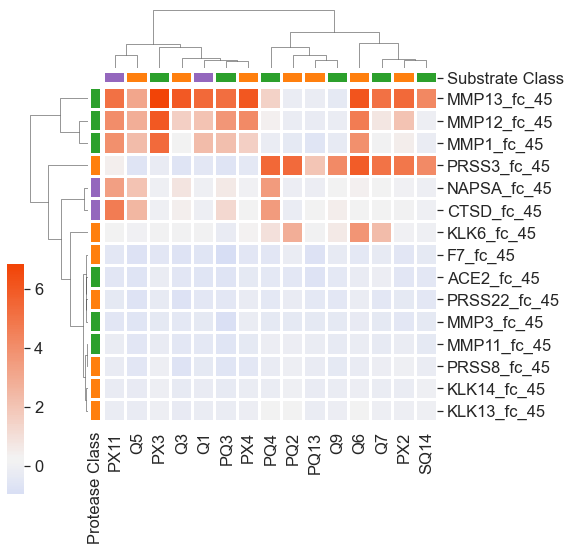

In [55]:
# Transpose matrix, perform hierarchical clustering and plot heatmap
agg_df_t = agg_df.T
paa.vis.plot_heatmap(agg_df_t, screen_out_dir, row_colors=cols_col, col_colors=cols_col, center=0.2,  metric='euclidean', method='ward', scale='log2')

In [56]:
# Scale the data, save it as a .csv file and display it 
scaled_data = paa.vis.scale_data(agg_df)
zscore_save_path = os.path.join(screen_out_dir, screen_name+"_z_scored.csv")
scaled_data.to_csv(zscore_save_path, index=False)
display(scaled_data)

PRSS22_fc_45  KLK14_fc_45  MMP11_fc_45  MMP3_fc_45  NAPSA_fc_45  \
                                                                        
PQ13     -0.026709    -0.440734     0.804867    0.401408    -0.521511   
PQ2       1.377068     1.651561     1.336453    0.342419    -0.517455   
PQ3      -0.553595    -1.751822    -1.841050   -2.735978    -0.320611   
PQ4       0.020109    -0.019483     1.386131    0.192301     2.683626   
PX11      0.205393    -0.364562     0.837549   -0.694049     2.260177   
PX2       0.211231     0.104351     0.829331   -0.257134    -0.489774   
PX3       0.660748     1.142223     0.609773    0.243924    -0.495145   
PX4       1.367689     0.379011    -0.709859    1.887356    -0.485143   
Q1       -0.361891    -0.933019    -0.926476    0.338803    -0.495145   
Q3       -1.960876    -1.510352    -1.096169   -0.139141    -0.273354   
Q5       -1.597583    -1.052560    -1.438913   -1.221305     0.445451   
Q6        1.840835     0.562358     0.783517    1.113701    -0.401919   
Q7       -0.302807     0.324498    -0.014935    0.392950    -0.438749   
Q9       -0.497426     0.278112    -0.069400    0.073639    -0.437901   
SQ14     -0.382188     1.630418    -0.490820    0.061106    -0.512547   

      KLK13_fc_45  ACE2_fc_45  KLK6_fc_45  CTSD_fc_45  PRSS8_fc_45  \
                                                                     
PQ13    -0.496315   -1.278093   -0.469083   -0.422155     0.339795   
PQ2      1.542930   -0.195897    1.304769   -0.460607     1.207829   
PQ3     -0.672768   -1.030008   -0.530375   -0.229451    -1.531185   
PQ4      1.656579    0.072537   -0.206187    1.197705     0.115044   
PX11    -0.668141   -0.613103   -0.429347    3.385782     0.425525   
PX2     -0.273334   -0.394563   -0.476395   -0.430783     1.459562   
PX3     -0.192773    1.738015   -0.468439   -0.441138     1.094053   
PX4     -0.341494    0.524454   -0.408215   -0.415827    -0.826282   
Q1      -0.650830   -0.751882   -0.464024   -0.451042    -0.435035   
Q3      -1.109693   -0.529178   -0.468875   -0.383073    -1.845209   
Q5      -1.011511   -1.090741   -0.480667    0.288227    -1.338773   
Q6       2.371760    1.442318    3.240098   -0.404481     0.170120   
Q7      -0.173237    2.077345    0.668473   -0.408596     0.806888   
Q9      -0.280133    0.056064   -0.317518   -0.379809    -0.432109   
SQ14     0.298963   -0.027266   -0.494217   -0.444753     0.789776   

      PRSS3_fc_45  F7_fc_45  MMP13_fc_45  MMP12_fc_45  MMP1_fc_45  
                                                                   
PQ13    -0.670890 -1.022798    -1.104780    -0.622236   -0.557925  
PQ2      1.288539  2.058151    -1.105845    -0.619784   -0.547145  
PQ3     -0.843919 -1.989995     0.003494     0.120295   -0.178254  
PQ4      1.410952 -0.085615    -1.044741    -0.594664   -0.535572  
PX11    -0.808097  0.161804    -0.053382     0.383442    0.860988  
PX2      0.677707 -0.267260     0.187914    -0.412888   -0.484522  
PX3     -0.832721 -0.000029     2.471831     3.305453    3.324593  
PX4     -0.839120 -0.113636     1.030913     0.452799   -0.333825  
Q1      -0.839798 -0.321869     0.186944    -0.416323   -0.149740  
Q3      -0.843936 -0.934413     0.830709    -0.487692   -0.513378  
Q5      -0.844280 -1.053505    -0.861968    -0.230343   -0.156822  
Q6       2.201486  0.461751     1.130444     0.927266    0.873887  
Q7       0.832733  1.169096    -0.035776    -0.569272   -0.521187  
Q9       0.066970  1.186912    -1.108680    -0.619961   -0.545284  
SQ14     0.044375  0.751405    -0.527077    -0.616094   -0.535816

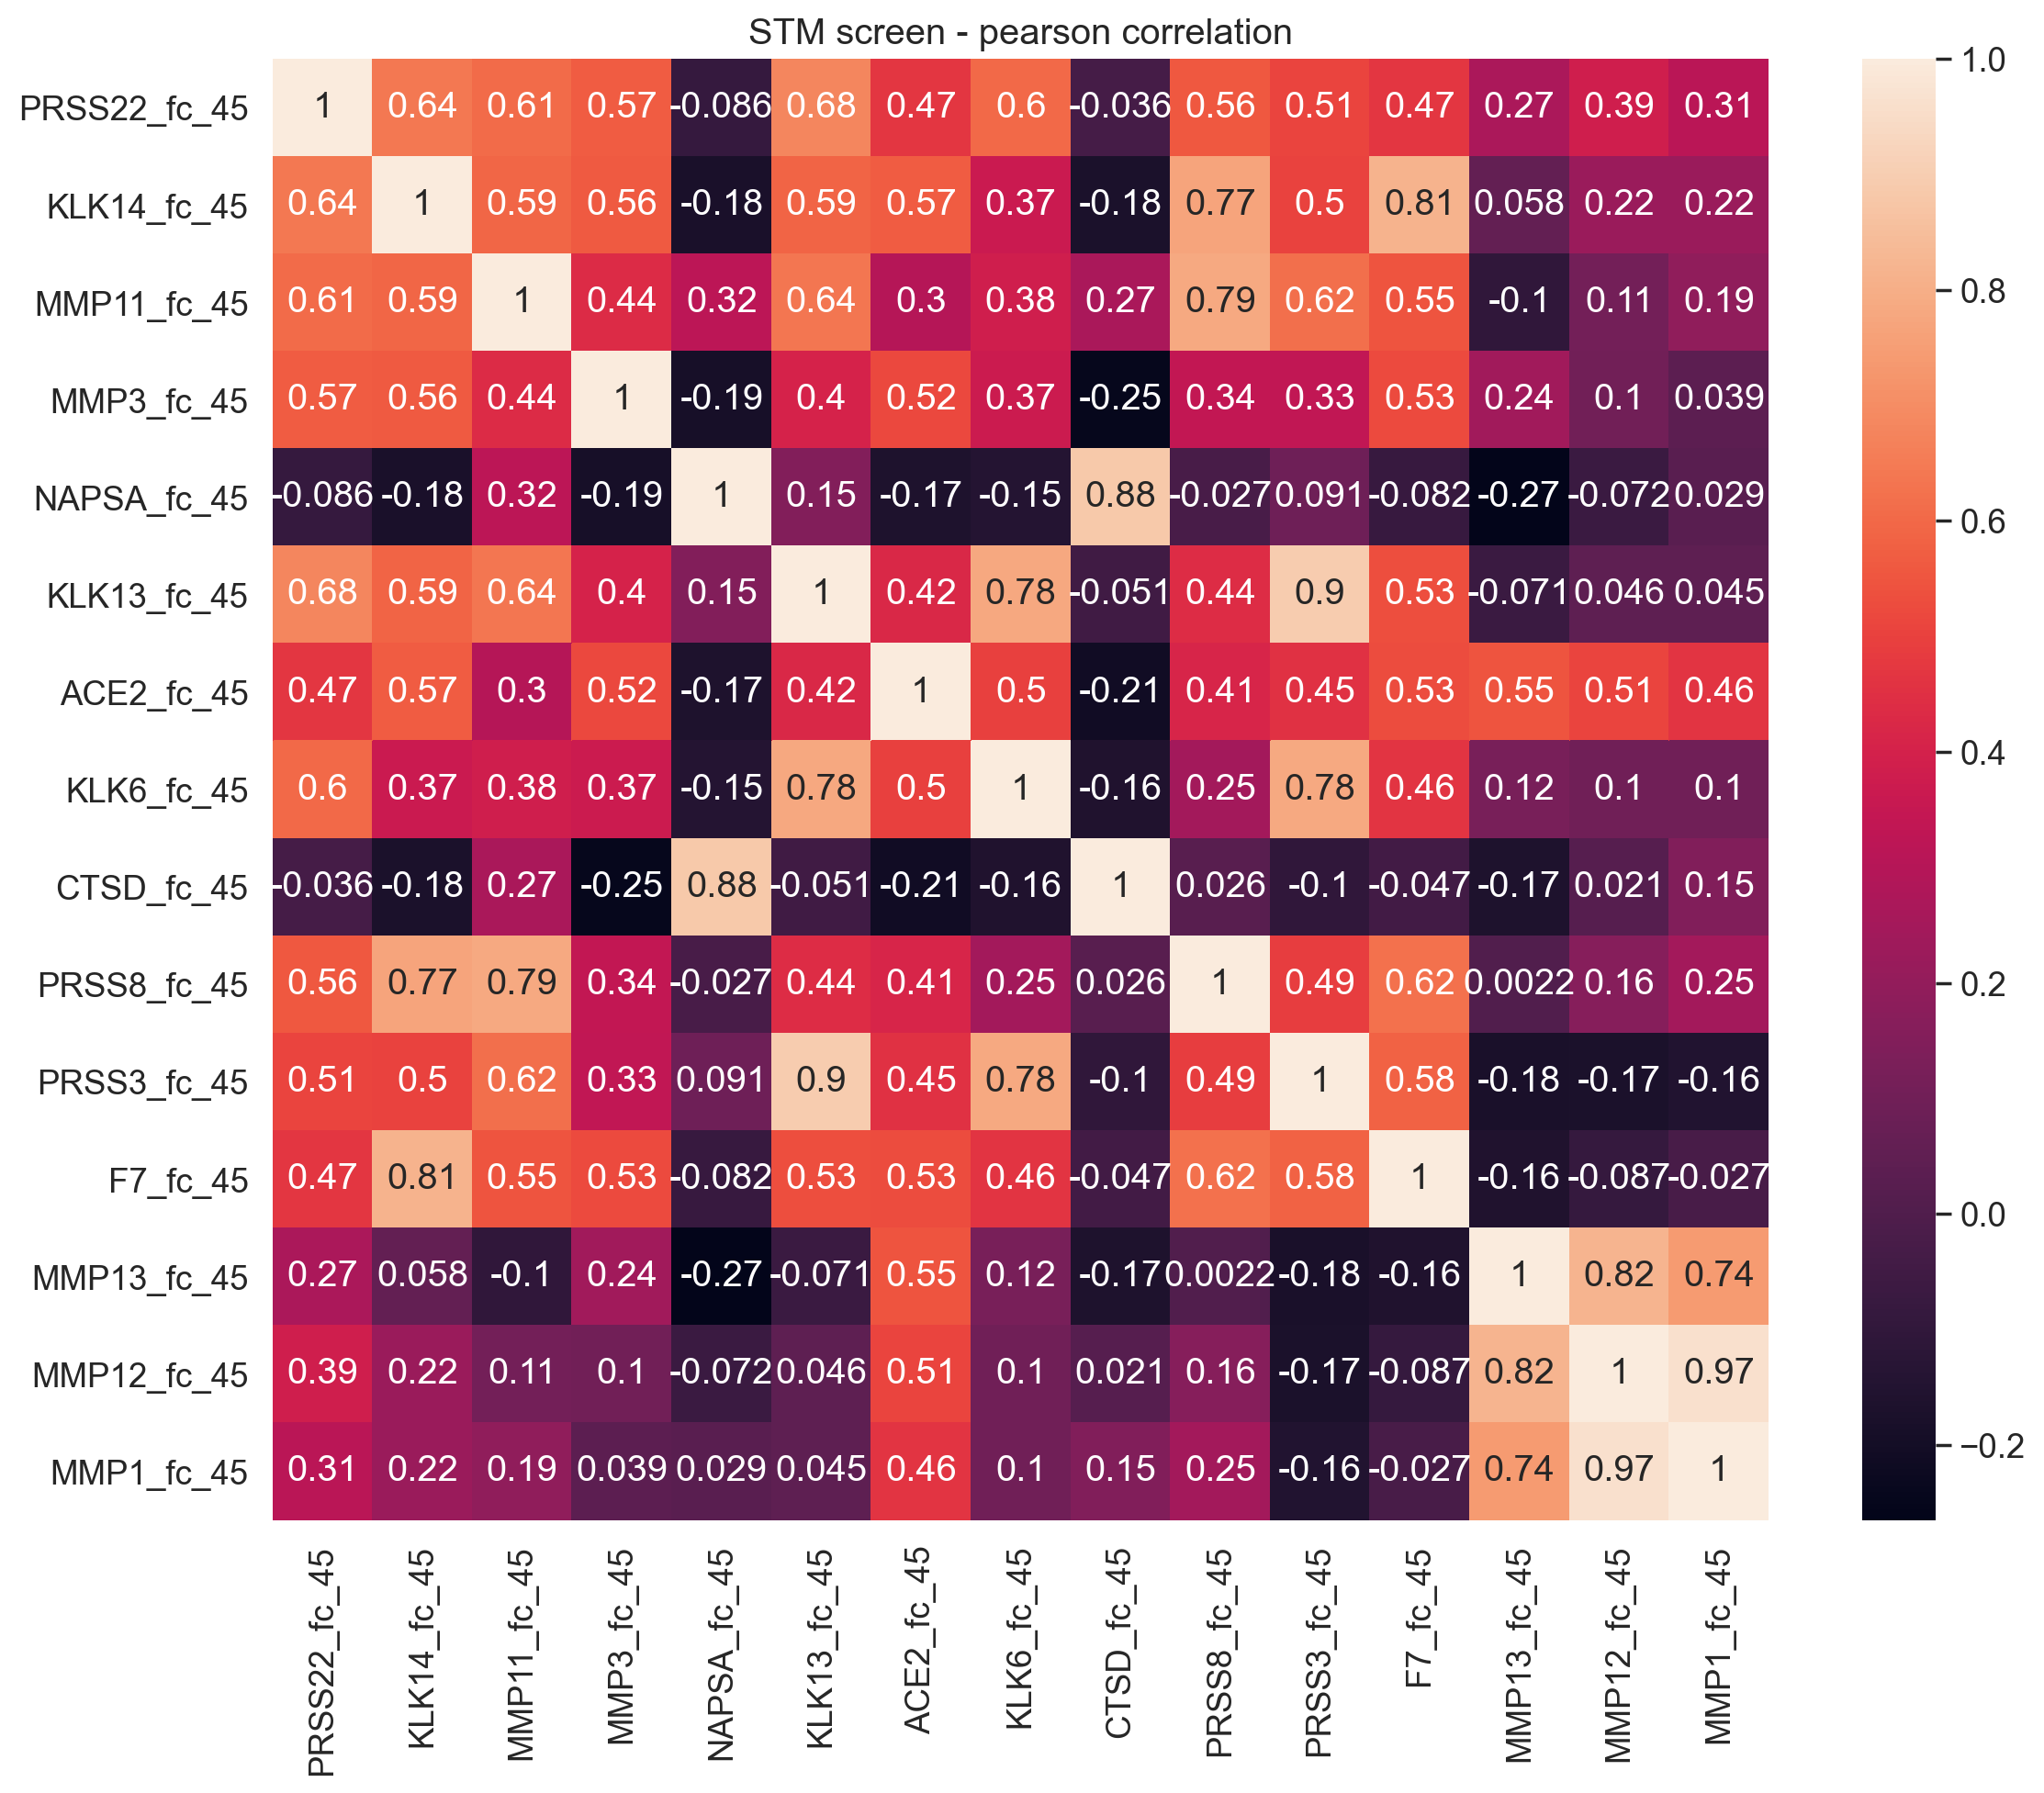

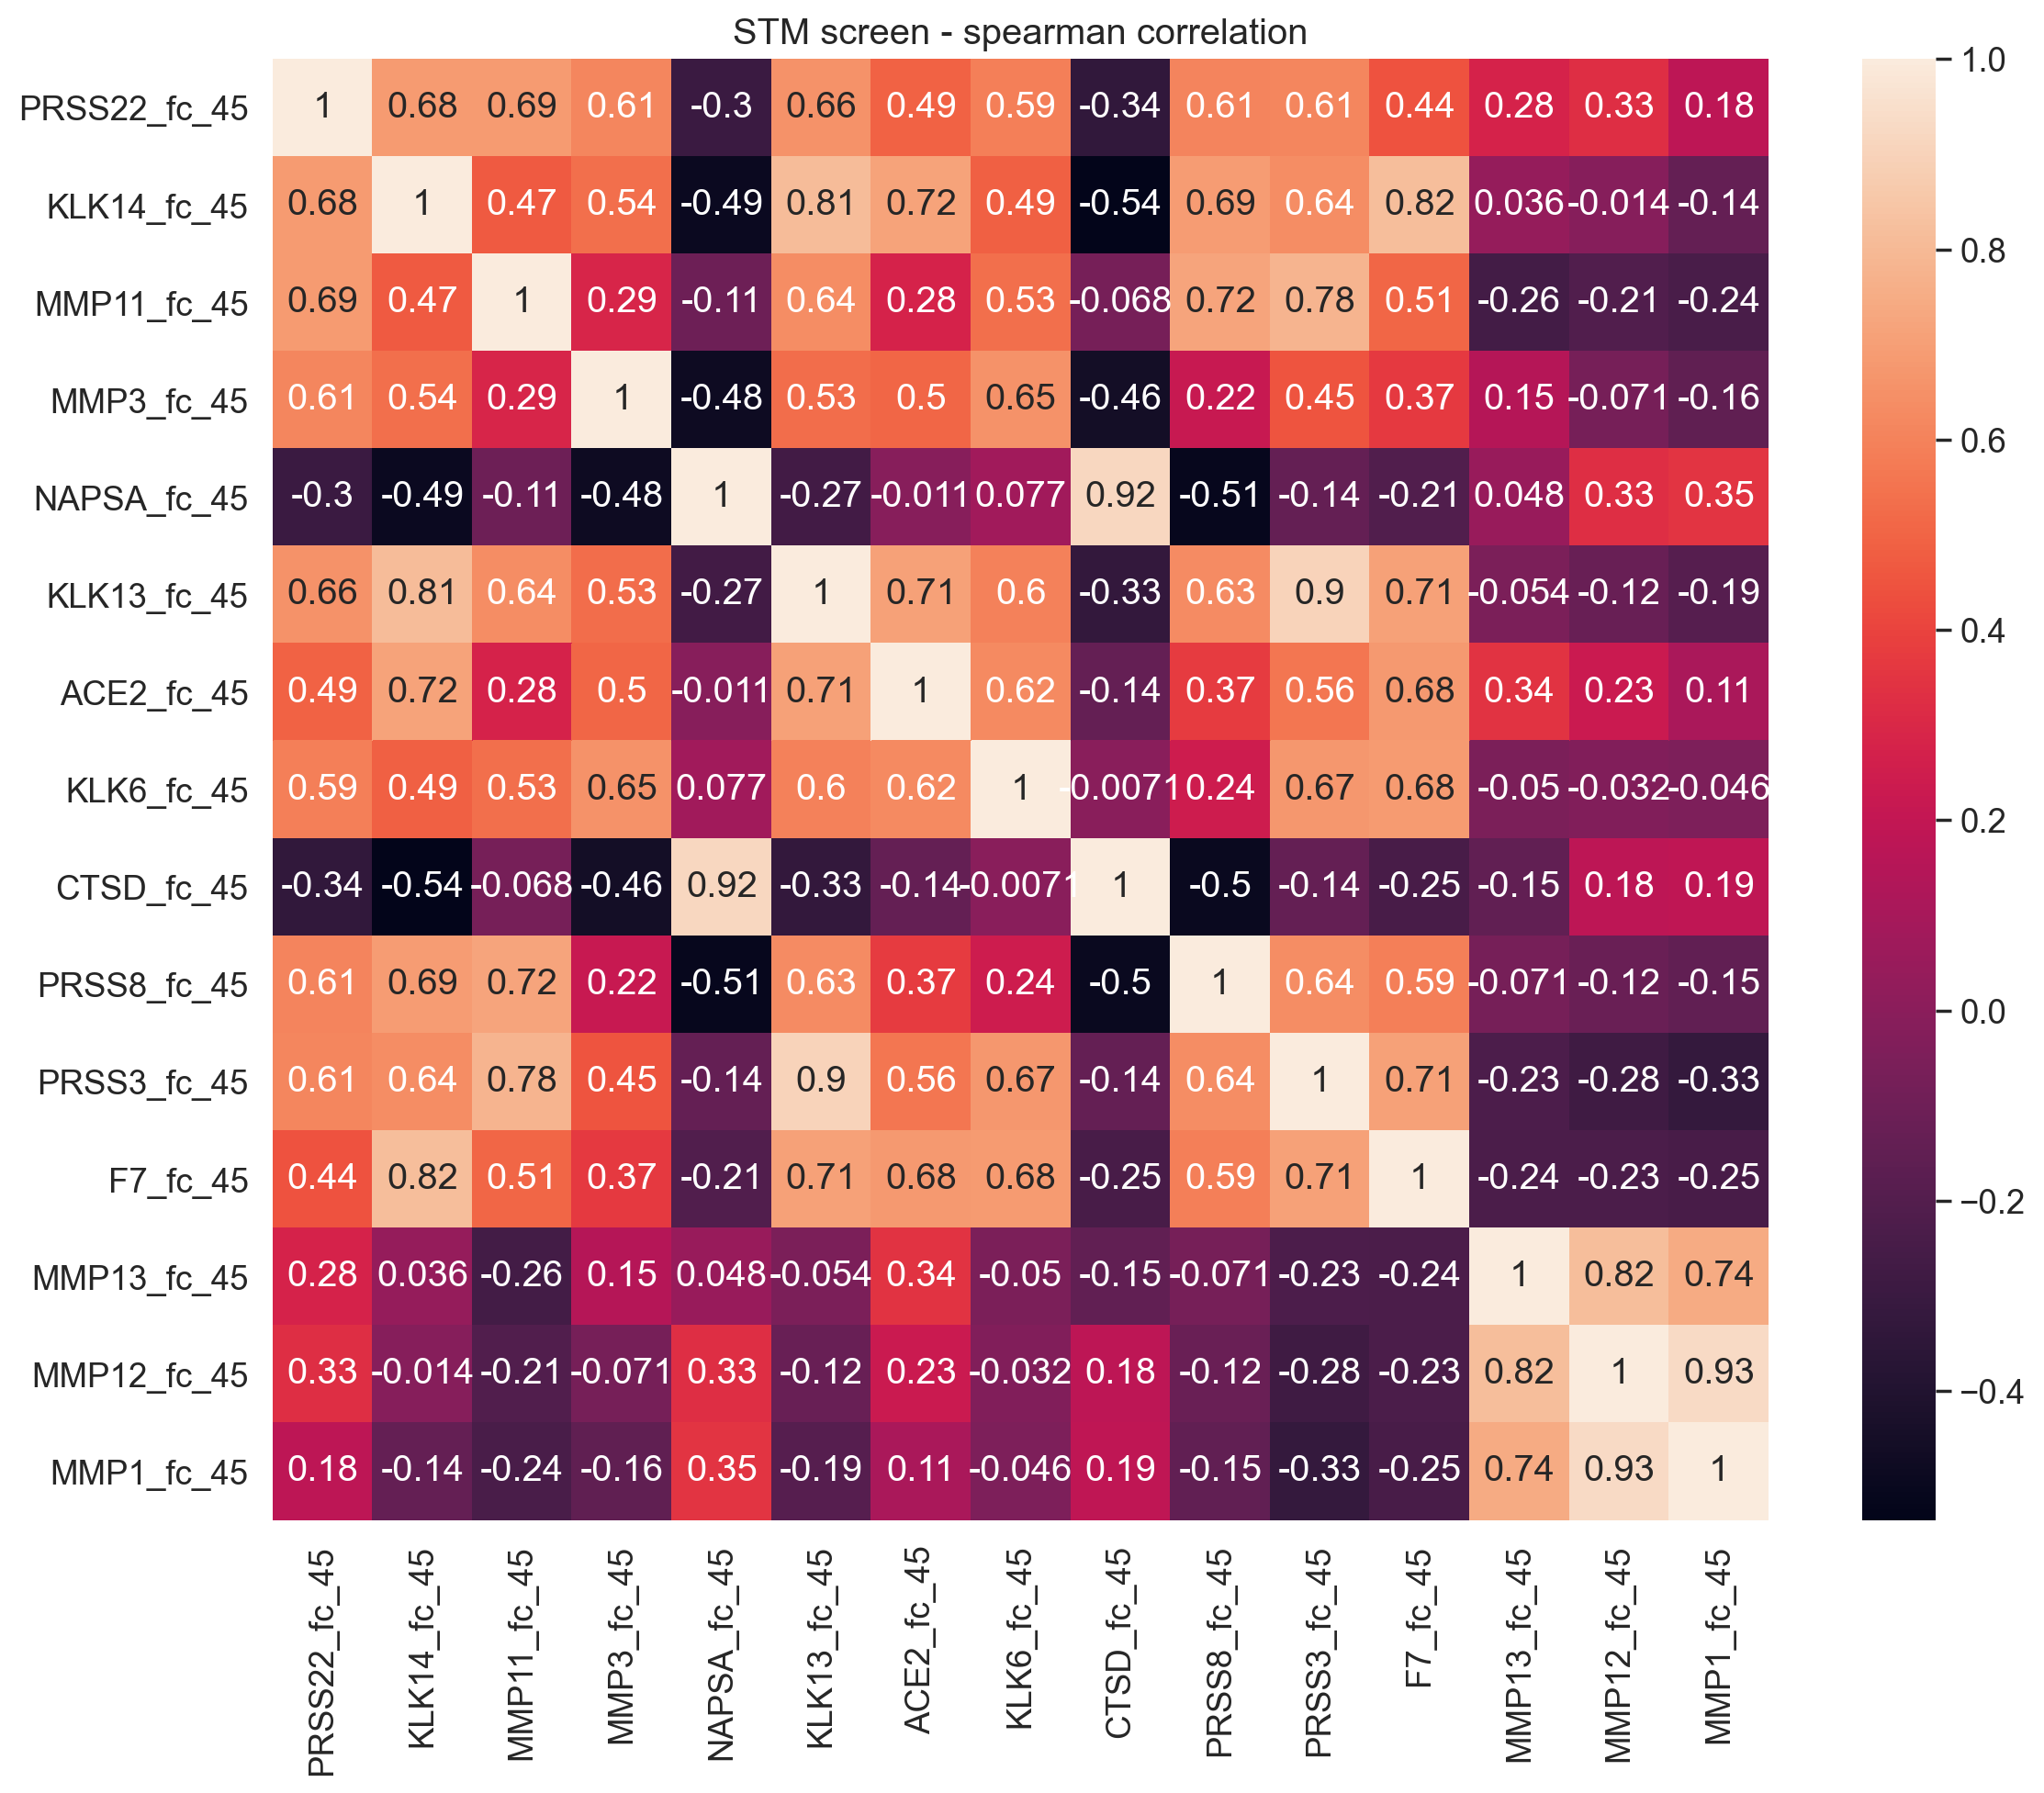

In [57]:
# Plot correlation matrix as defined by the pearson or spearman correlation 
corr_matrix_pearson = paa.vis.plot_correlation_matrix(scaled_data, screen_name, screen_out_dir, method='pearson');
corr_matrix_spear = paa.vis.plot_correlation_matrix(scaled_data, screen_name, screen_out_dir, method='spearman');

In [28]:
# Use paa.vis.plot_zscore_scatter to generate scatterplots of zscores for all possible pairwise combinations of samples
paa.vis.plot_zscore_scatter(scaled_data, screen_out_dir, corr_matrix_pearson, corr_matrix_spear)

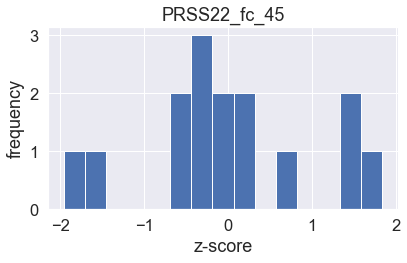

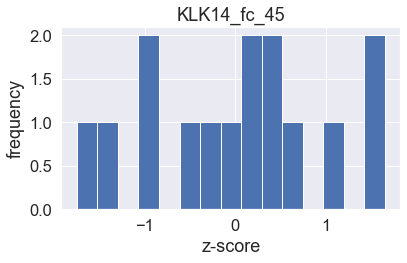

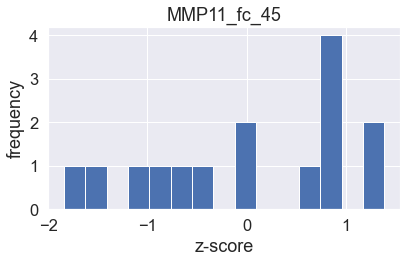

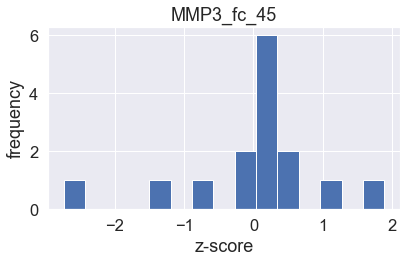

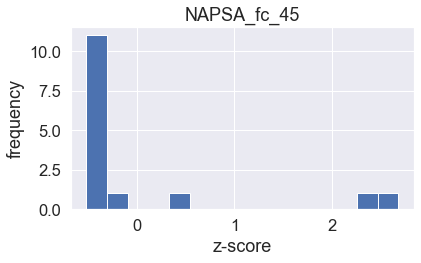

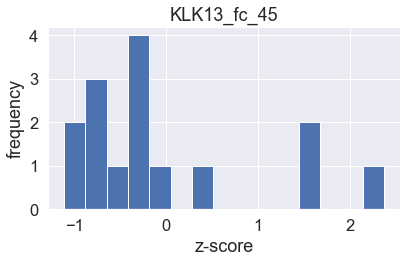

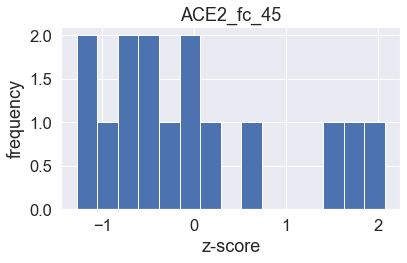

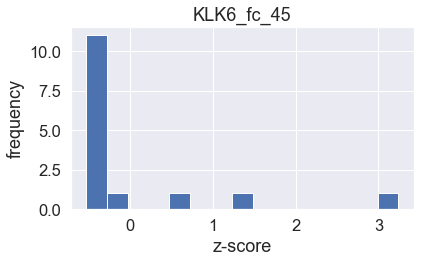

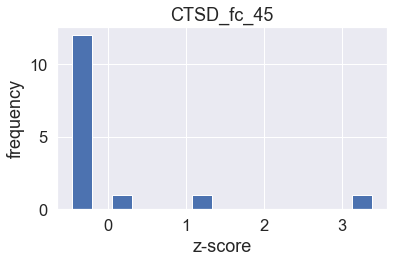

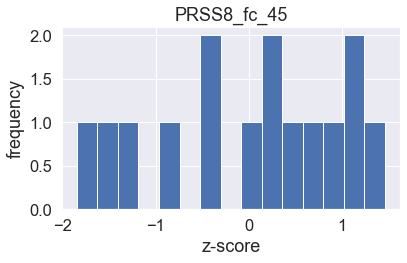

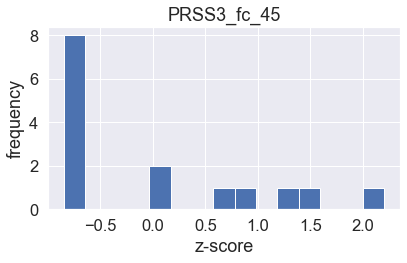

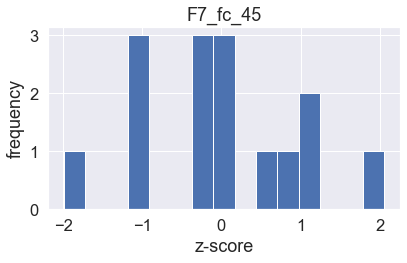

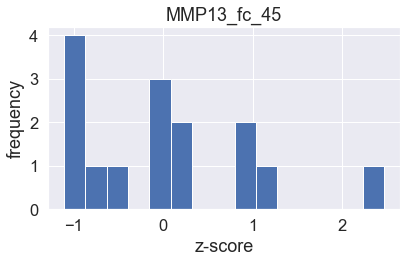

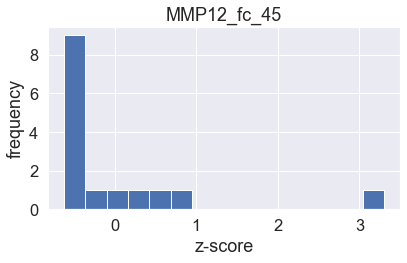

In [58]:
# Use paa.vis.plot_zscore_hist to plot histograms of z-scores for each 
# sample, could be helpful for QC or to determine how promiscuous vs. 
# specifically a given sample cleavaes the substrate library queried
paa.vis.plot_zscore_hist(scaled_data, screen_out_dir)

In [30]:
# Use paa.vis.top_n_hits to return top cleaved substrates for each sample

# Requires defining ind_dict (dictionary with keys = substrate index in data_matrix and values = substrate name)
ind_dict = pd.Series(agg_df.index, index=range(agg_df.shape[0])).to_dict()
print('ind_dict:', ind_dict)

# Get top n=4 hits
paa.vis.top_n_hits(agg_df, ind_dict, screen_out_dir, n=4)

ind_dict: {0: 'PQ13', 1: 'PQ2', 2: 'PQ3', 3: 'PQ4', 4: 'PX11', 5: 'PX2', 6: 'PX3', 7: 'PX4', 8: 'Q1', 9: 'Q3', 10: 'Q5', 11: 'Q6', 12: 'Q7', 13: 'Q9', 14: 'SQ14'}


PRSS22_fc_45 KLK14_fc_45 MMP11_fc_45 MMP3_fc_45 NAPSA_fc_45 KLK13_fc_45  \
0           Q6         PQ2         PQ4        PX4         PQ4          Q6   
1          PQ2        SQ14         PQ2         Q6        PX11         PQ4   
2          PX4         PX3        PX11       PQ13          Q5         PQ2   
3          PX3          Q6         PX2         Q7          Q3        SQ14   

  ACE2_fc_45 KLK6_fc_45 CTSD_fc_45 PRSS8_fc_45 PRSS3_fc_45 F7_fc_45  \
0         Q7         Q6       PX11         PX2          Q6      PQ2   
1        PX3        PQ2        PQ4         PQ2         PQ4       Q9   
2         Q6         Q7         Q5         PX3         PQ2       Q7   
3        PX4        PQ4        PQ3          Q7          Q7     SQ14   

  MMP13_fc_45 MMP12_fc_45 MMP1_fc_45  
0         PX3         PX3        PX3  
1          Q6          Q6         Q6  
2         PX4         PX4       PX11  
3          Q3        PX11         Q1

In [59]:
# To identify commonalities between the substrates that are best cleaved 
# by each sample, threshold by z-score first using 
# paa.vis.threshold_substrates

thresh_df = paa.vis.threshold_substrates(scaled_data, ind_dict, screen_out_dir, threshold=0)
thresh_df

PRSS22_fc_45 KLK14_fc_45 MMP11_fc_45 MMP3_fc_45 NAPSA_fc_45 KLK13_fc_45  \
0           Q6         PQ2         PQ4        PX4         PQ4          Q6   
1          PQ2        SQ14         PQ2         Q6        PX11         PQ4   
2          PX4         PX3        PX11       PQ13          Q5         PQ2   
3          PX3          Q6         PX2         Q7         NaN        SQ14   
4          PX2         PX4        PQ13        PQ2         NaN         NaN   
5         PX11          Q7          Q6         Q1         NaN         NaN   
6          PQ4          Q9         PX3        PX3         NaN         NaN   
7          NaN         PX2         NaN        PQ4         NaN         NaN   
8          NaN         NaN         NaN         Q9         NaN         NaN   
9          NaN         NaN         NaN       SQ14         NaN         NaN   

  ACE2_fc_45 KLK6_fc_45 CTSD_fc_45 PRSS8_fc_45 PRSS3_fc_45 F7_fc_45  \
0         Q7         Q6       PX11         PX2          Q6      PQ2   
1        PX3        PQ2        PQ4         PQ2         PQ4       Q9   
2         Q6         Q7         Q5         PX3         PQ2       Q7   
3        PX4        NaN        NaN          Q7          Q7     SQ14   
4        PQ4        NaN        NaN        SQ14         PX2       Q6   
5         Q9        NaN        NaN        PX11          Q9     PX11   
6        NaN        NaN        NaN        PQ13        SQ14      NaN   
7        NaN        NaN        NaN          Q6         NaN      NaN   
8        NaN        NaN        NaN         PQ4         NaN      NaN   
9        NaN        NaN        NaN         NaN         NaN      NaN   

  MMP13_fc_45 MMP12_fc_45 MMP1_fc_45  
0         PX3         PX3        PX3  
1          Q6          Q6         Q6  
2         PX4         PX4       PX11  
3          Q3        PX11        NaN  
4         PX2         PQ3        NaN  
5          Q1         NaN        NaN  
6         PQ3         NaN        NaN  
7         NaN         NaN        NaN  
8         NaN         NaN        NaN  
9         NaN         NaN        NaN

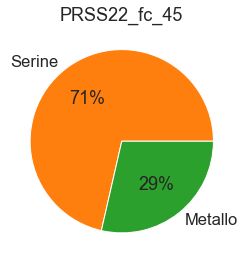

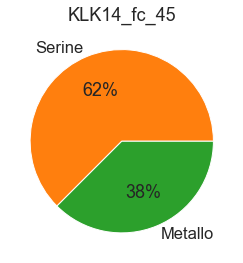

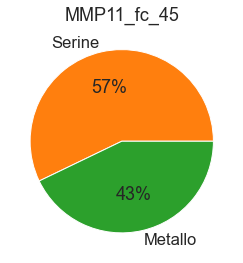

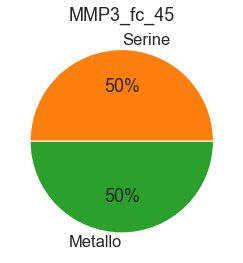

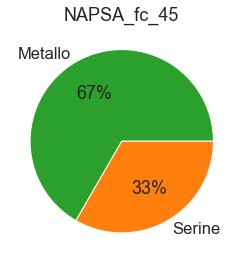

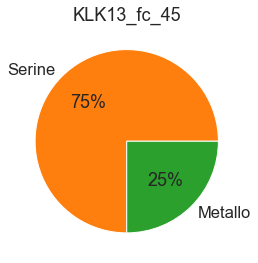

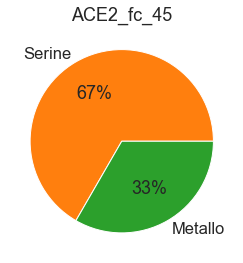

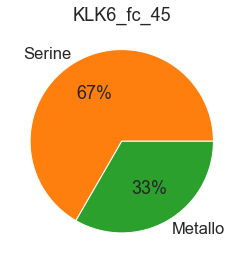

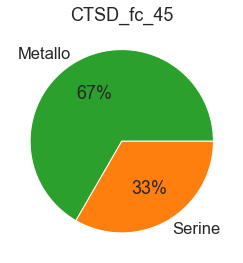

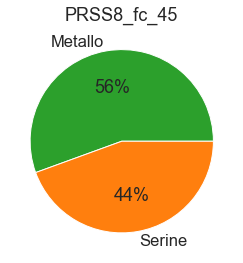

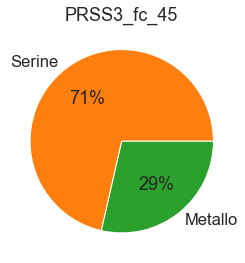

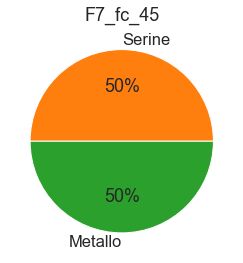

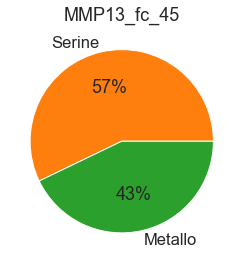

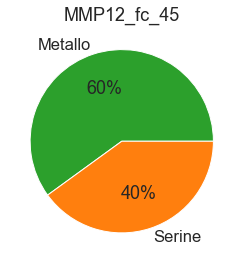

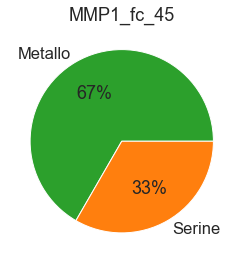

In [60]:
# Use paa.vis.plot_substrate_class_pie to plot pie chart of substrates cleavaed above z_threshold, color coded by susceptibility to protease class in fake_row_df
paa.vis.plot_substrate_class_pie(thresh_df, fake_row_df, prot_col_map, screen_out_dir)

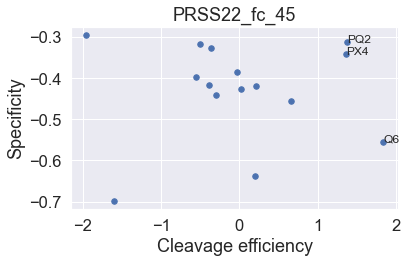

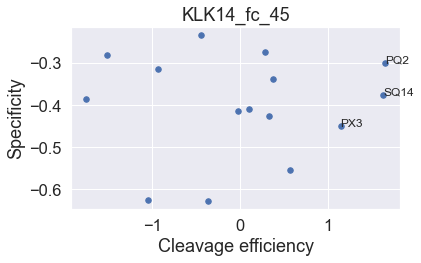

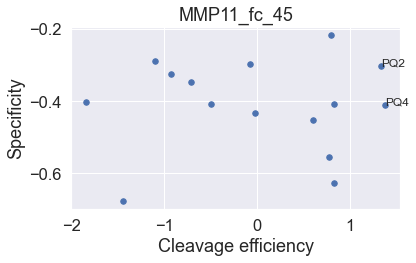

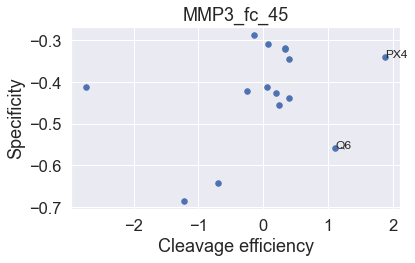

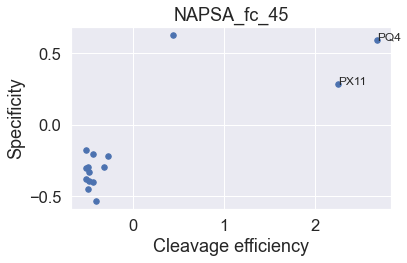

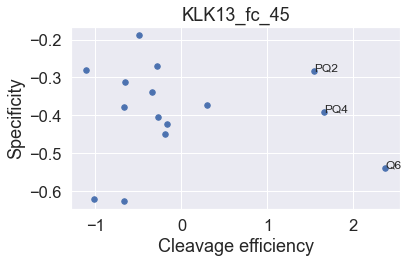

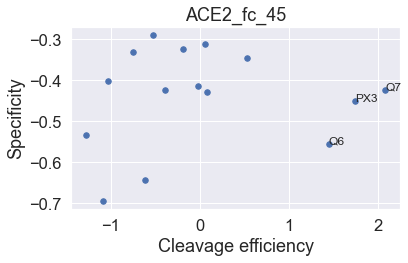

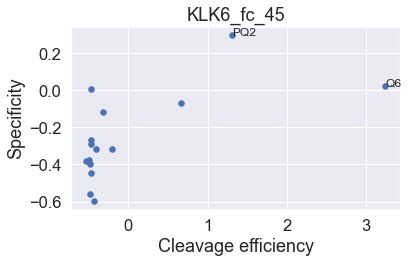

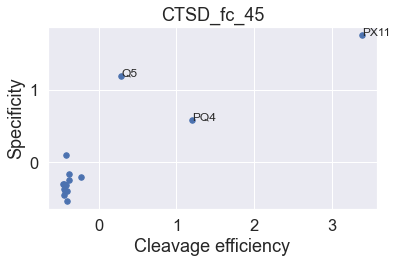

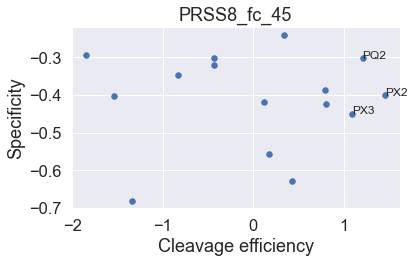

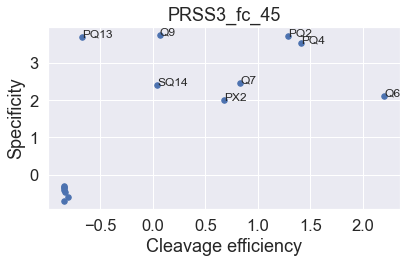

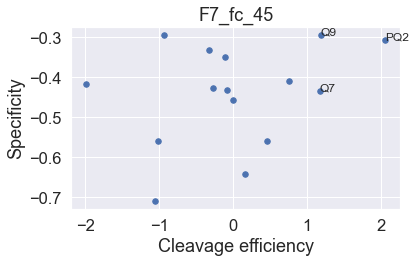

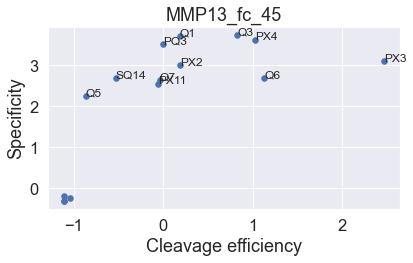

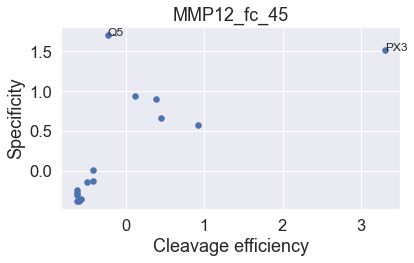

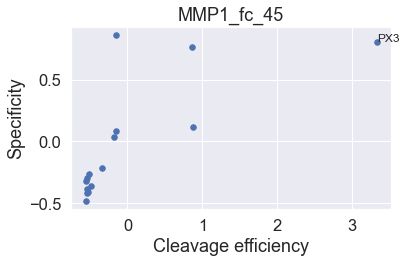

In [61]:
# Plot scatterplot with zscores by sample or by susbtrate to infer specificity of substrate for a given protease
paa.vis.specificity_analysis(agg_df, screen_out_dir, threshold=1)

TypeError: top_n_hits() got an unexpected keyword argument 'plot'

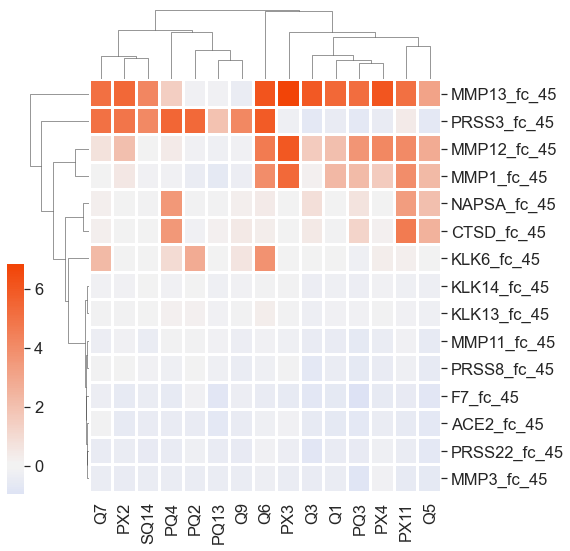

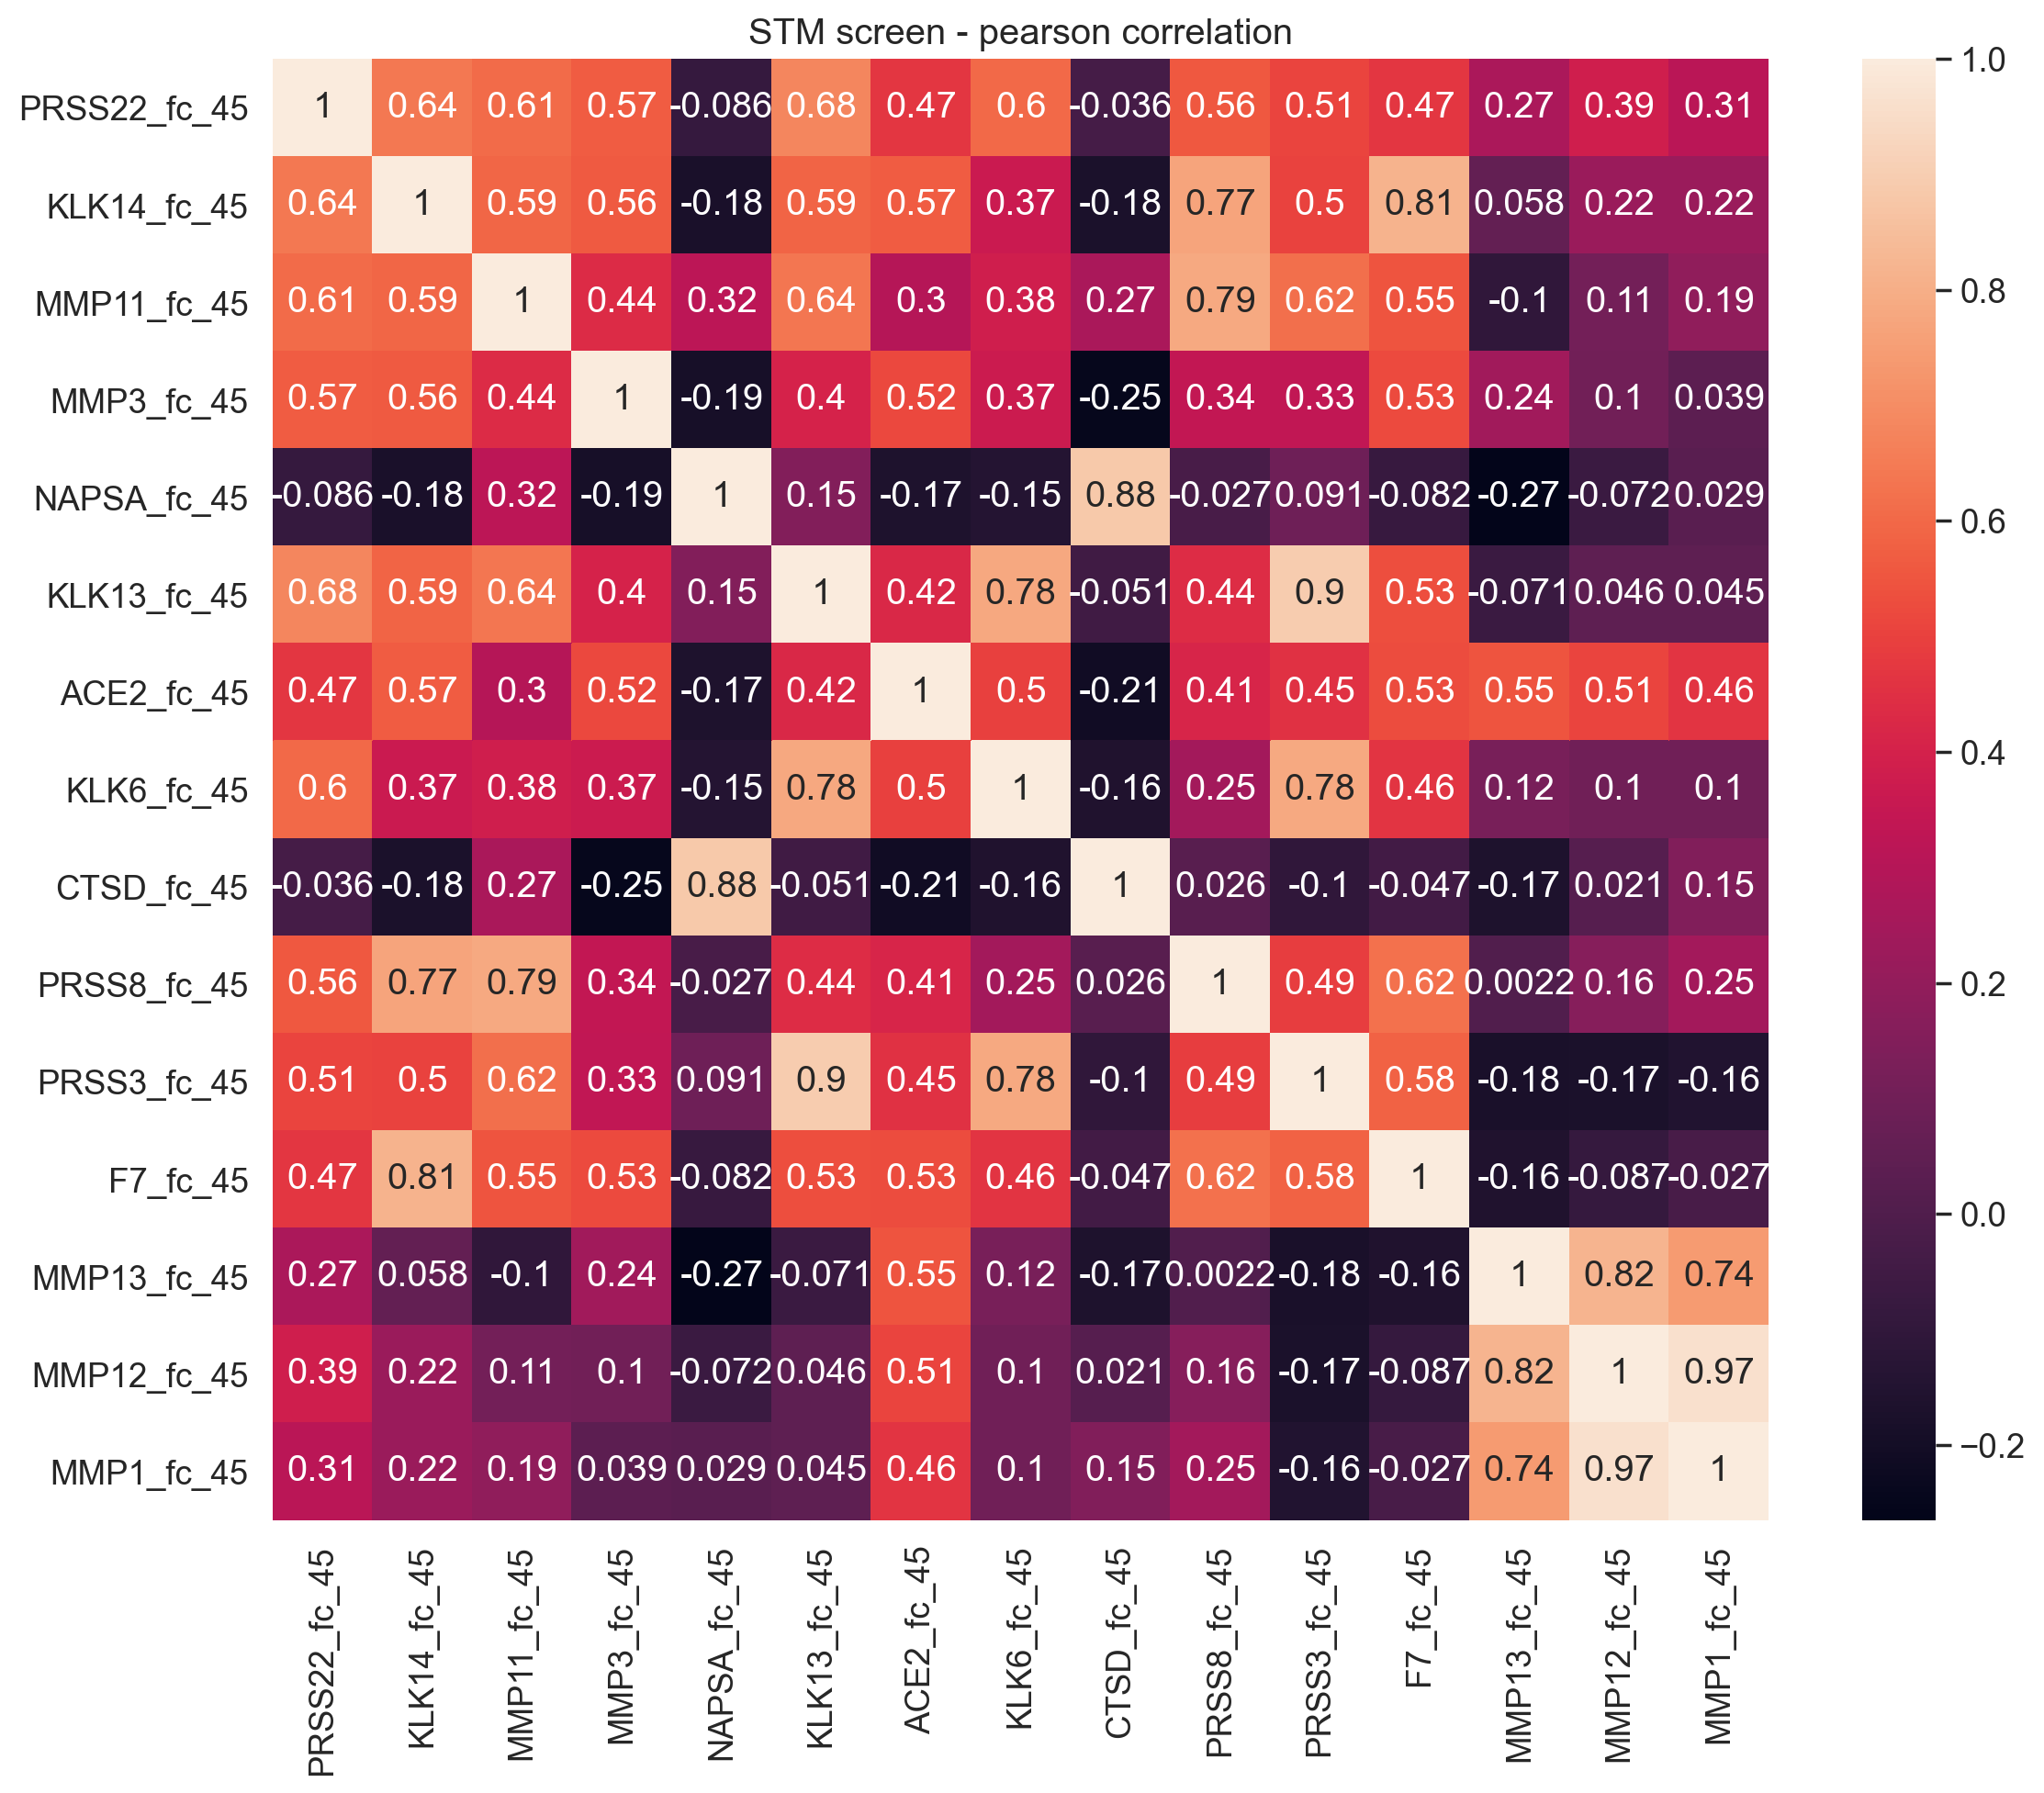

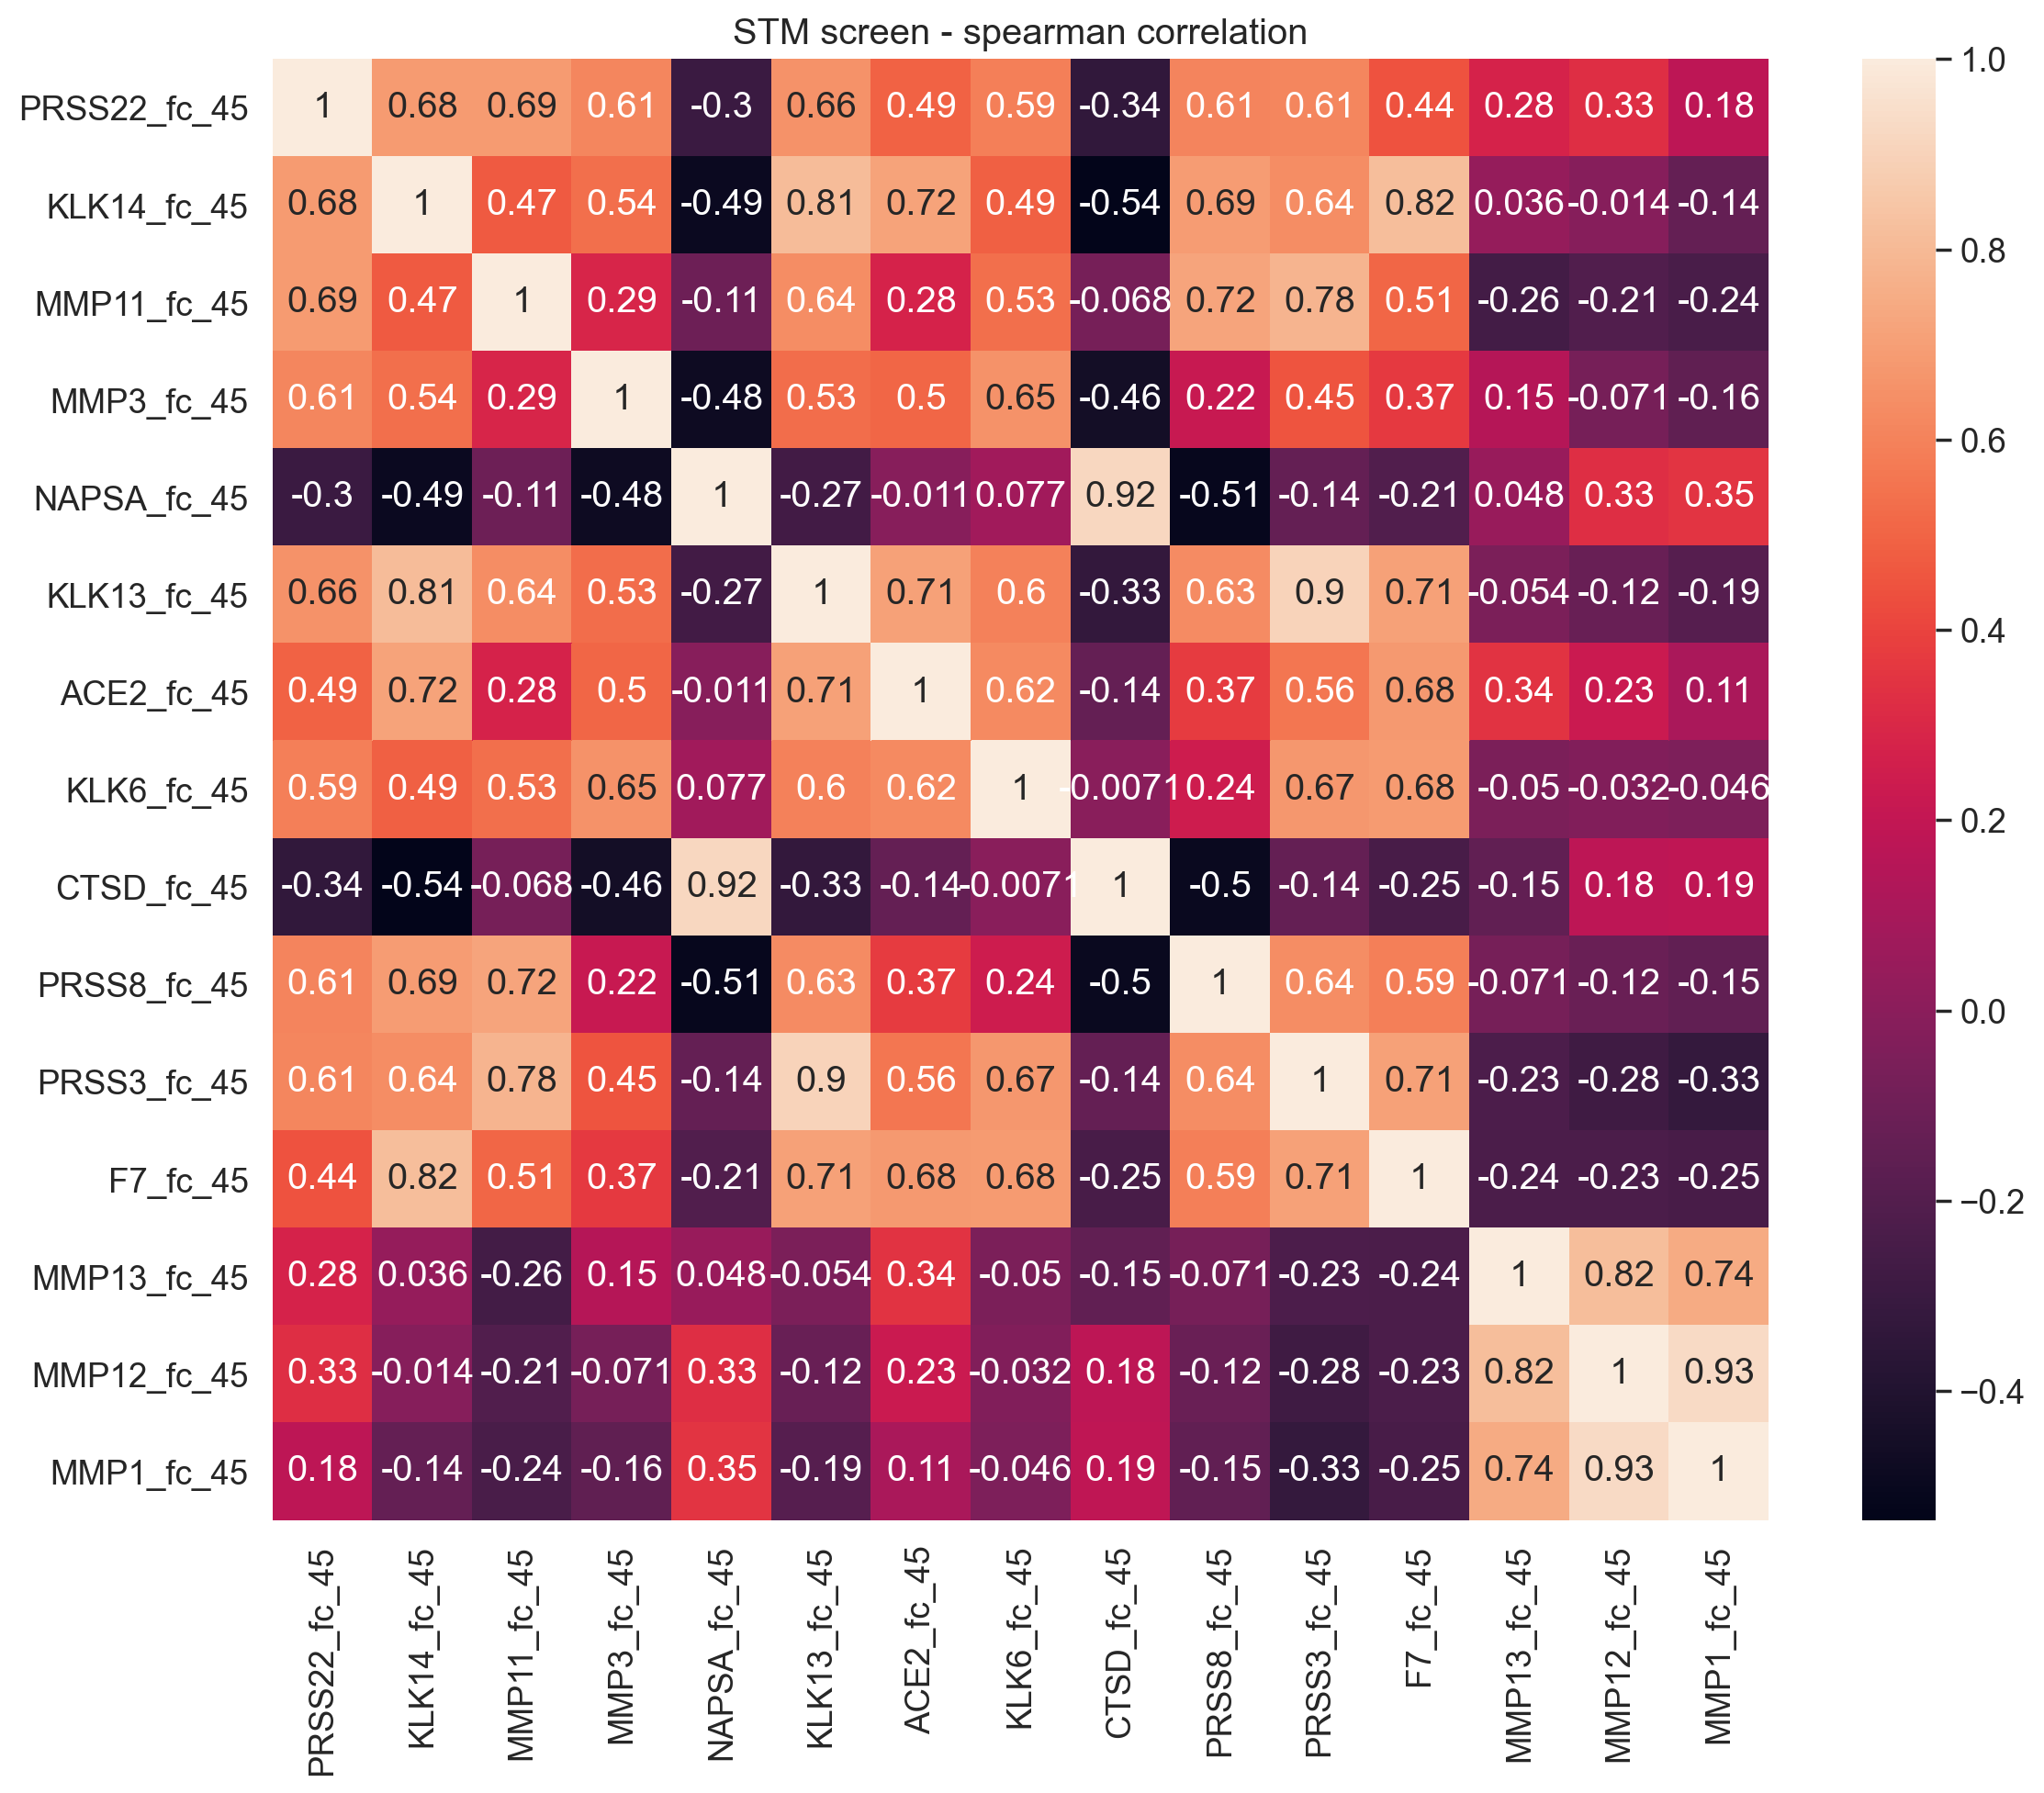

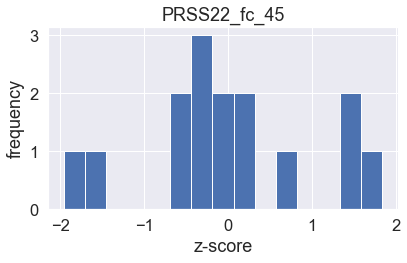

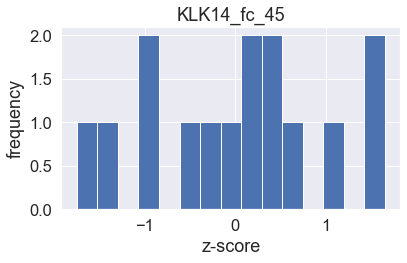

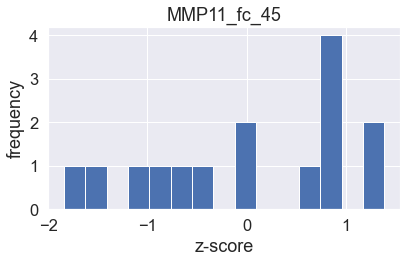

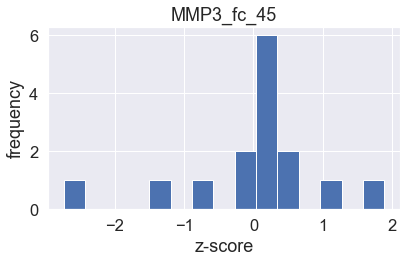

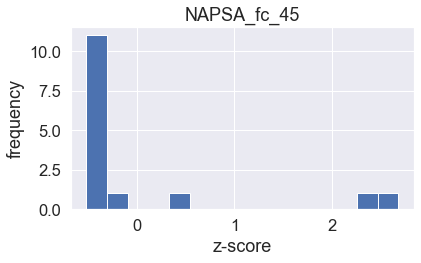

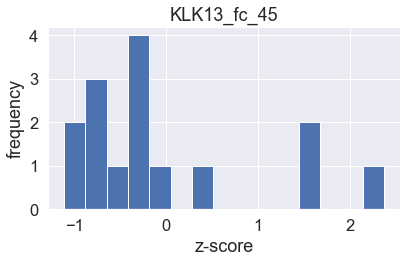

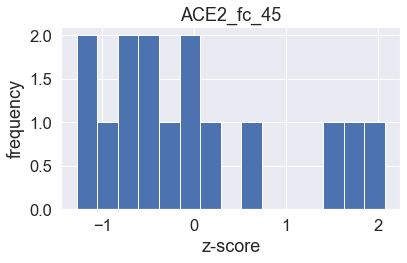

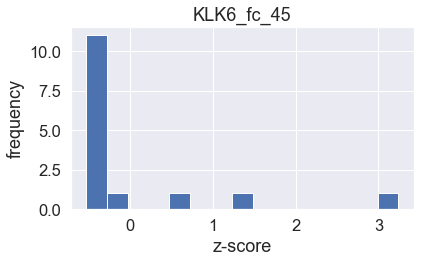

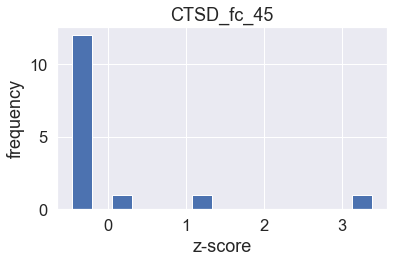

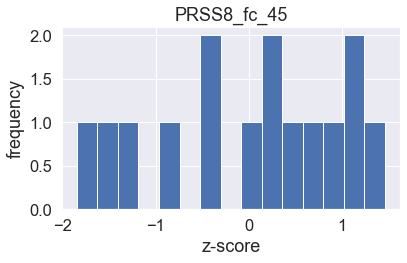

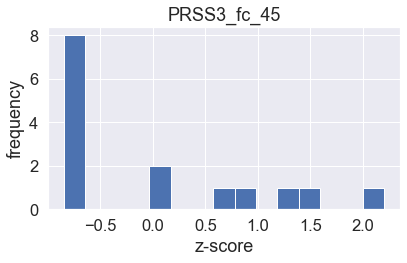

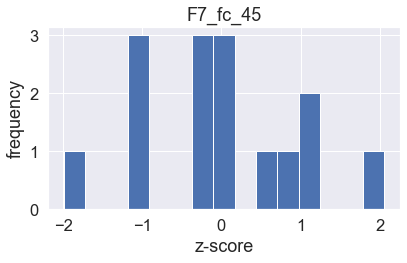

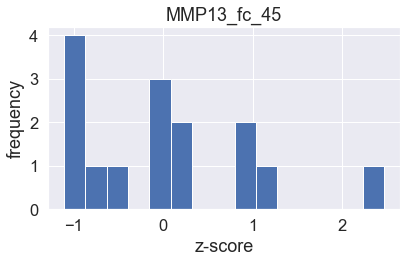

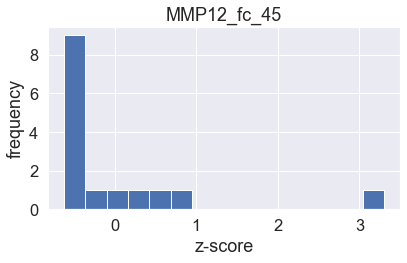

In [34]:
# Running this function automatically generates all data above 
paa.kinetic.kinetic_visualization(data_path=fc_files, screen_name=screen_name, out_dir=screen_out_dir, row_dict=fake_row_df, col_dict=None, col_map=prot_col_map, n=5, b=15, threshold=1, process=False)